# Import packages

In [1]:
import os
import cmaps
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
from netCDF4 import Dataset
from datetime import date
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
rcParams['font.family'] = 'sans-serif'
directory   = '/srv/scratch/z3533156'

# Read SST, GSST and GSST trend

In [2]:
dataset1   = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_mean.mat')
dataset2   = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_trend.mat')
oisst_lon  = dataset1['oisst_lon'][:,:]
oisst_lat  = dataset1['oisst_lat'][:,:]
sst_mean   = dataset1['oisst_mean'][:,:]
gsst_mean  = dataset1['gsst_mean'][:,:]*1e5
gsst_trend = dataset2['gsst_trend'][:,:]*3650*1e5
gsst_p     = dataset2['gsst_p'][:,:]
gsst_p[np.where(gsst_p > 0.05)]   = np.nan
dataset2   = xr.open_dataset(directory+'/BRAN_WBC/SO/AVISO/AVISO_monthly_SSH_LS_detrend.nc')
aviso_ssh0 = dataset2.adt.mean(axis=0).transpose().values
aviso_ssh  = np.concatenate((aviso_ssh0[720:,:],aviso_ssh0[:720,:]),axis=0)

# Plot the spatial distribution of SST, GSST and GSST trend

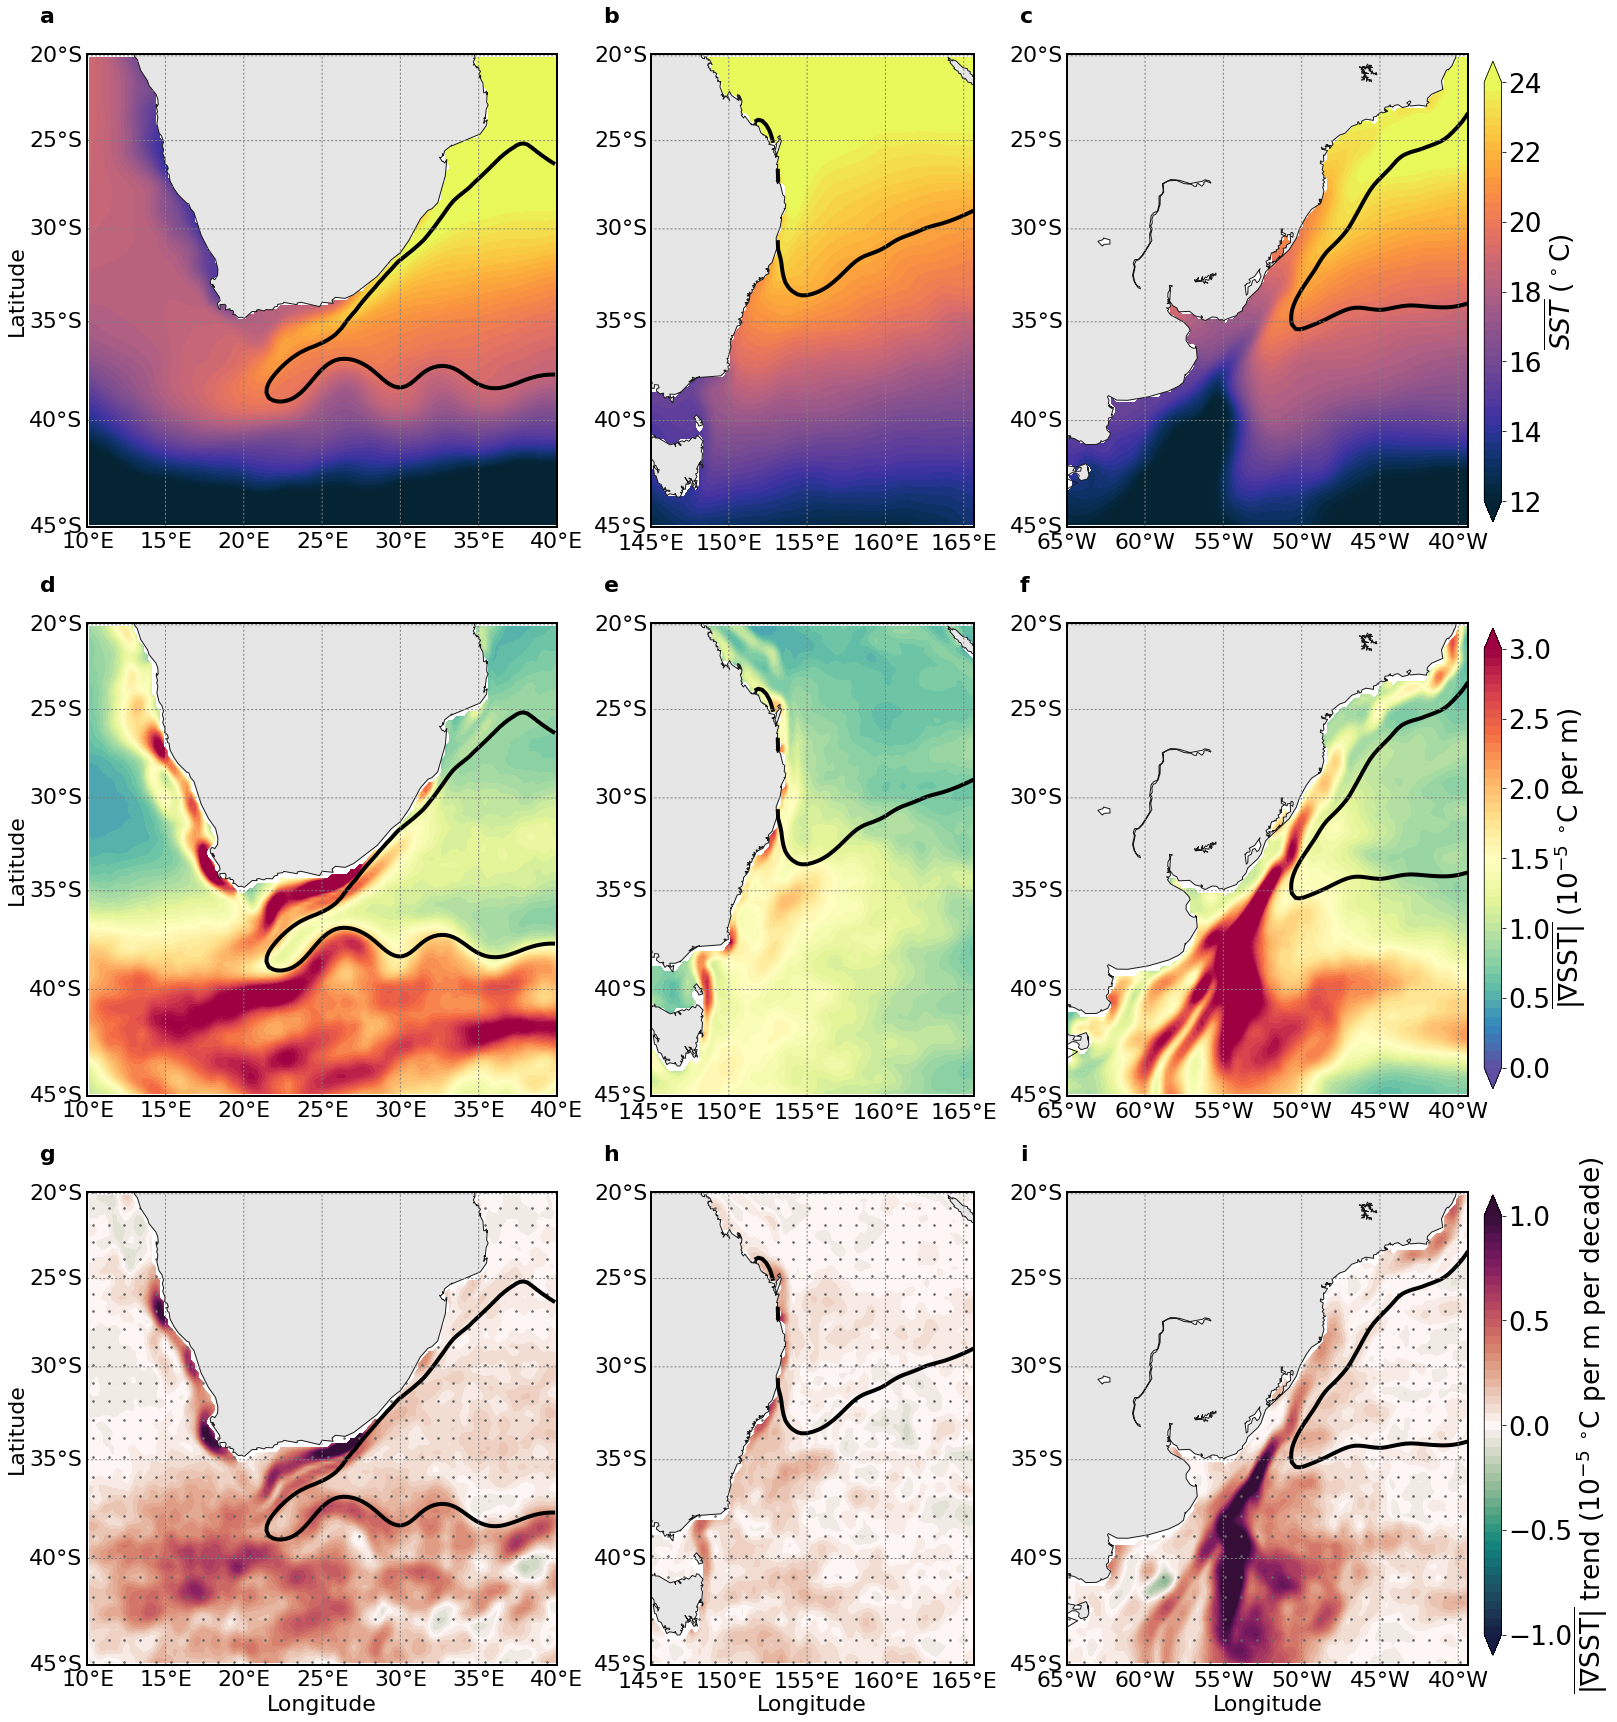

In [4]:
##############################################################################################################
labels      = ['a','b','c','d','e','f','g','h','i']
levels1     = np.linspace(12,24,50)
levels2     = np.linspace(0,3,50)
levels3     = np.linspace(-1.0,1.0,50)
tick_marks1 = np.linspace(12,24,7)
tick_marks2 = np.linspace(0,3,7)
tick_marks3 = np.linspace(-1.0,1.0,5)
cmaps1      = cmaps.cmocean_thermal
cmaps2      = plt.cm.get_cmap('Spectral_r')
cmaps3      = cmaps.cmocean_curl
fig_ratio   = 0.9
fig         = plt.figure(figsize=(24, 32))
gs          = gridspec.GridSpec(4,3)
labelfont   = 22
padspacescale = 10
labelpadscale = 2
linefont    = 1
scale       = 1.25
m_scale     = 10 
##############################################################################################################
for i in range(9):
    if i==0: 
        lon       = oisst_lon[0:202,60:204]      
        lat       = oisst_lat[0:202,60:204]      
        var_ssh   = aviso_ssh[0:202,60:204]      
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = sst_mean[0:202,60:204]            
    elif i==1:
        lon       = oisst_lon[579:663,60:164]      
        lat       = oisst_lat[579:663,60:164]  
        var_ssh   = aviso_ssh[579:663,60:164]  
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = sst_mean[579:663,60:164]         
    elif i==2:
        lon       = oisst_lon[1179:1283,40:164]      
        lat       = oisst_lat[1179:1283,40:164]    
        var_ssh   = aviso_ssh[1179:1283,40:164]    
        ssh_level = np.arange(0.599,0.601,10)
        var_mean  = sst_mean[1179:1283,40:164]                     
    elif i==3:
        lon       = oisst_lon[0:202,60:204]     
        lat       = oisst_lat[0:202,60:204] 
        var_ssh   = aviso_ssh[0:202,60:204]      
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = gsst_mean[0:202,60:204]     
    elif i==4:  
        lon       = oisst_lon[579:663,60:164]      
        lat       = oisst_lat[579:663,60:164] 
        var_ssh   = aviso_ssh[579:663,60:164]     
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = gsst_mean[579:663,60:164]      
    elif i==5:
        lon       = oisst_lon[1179:1283,40:164]       
        lat       = oisst_lat[1179:1283,40:164] 
        var_ssh   = aviso_ssh[1179:1283,40:164] 
        ssh_level = np.arange(0.599,0.601,10)
        var_mean  = gsst_mean[1179:1283,40:164]                    
    elif i==6:
        lon       = oisst_lon[0:202,60:204]           
        lat       = oisst_lat[0:202,60:204]       
        var_ssh   = aviso_ssh[0:202,60:204]      
        ssh_level = np.arange(0.899,0.901,10)   
        var_mean  = gsst_trend[0:202,60:204]
        var_p     = gsst_p[0:202,60:204]
    elif i==7:
        lon       = oisst_lon[579:663,60:164]      
        lat       = oisst_lat[579:663,60:164]  
        var_ssh   = aviso_ssh[579:663,60:164]   
        ssh_level = np.arange(0.899,0.901,10)
        var_mean  = gsst_trend[579:663,60:164] 
        var_p     = gsst_p[579:663,60:164]      
    else:
        lon       = oisst_lon[1179:1283,40:164]      
        lat       = oisst_lat[1179:1283,40:164]     
        var_ssh   = aviso_ssh[1179:1283,40:164]    
        ssh_level = np.arange(0.599,0.601,10)
        var_mean  = gsst_trend[1179:1283,40:164]   
        var_p     = gsst_p[1179:1283,40:164]    
  
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ax = fig.add_subplot(gs[i])
    l, b, w, h = ax.get_position().bounds
    if np.mod(i,3)==0:     
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=10,urcrnrlon=40,resolution='l')    
        plt.ylabel('Latitude',fontsize=labelfont,labelpad=6*padspacescale,family='sans-serif')
        cx,cy = m(7, -18.0)
    elif np.mod(i,3)==1:
        m      = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=145,urcrnrlon=np.nanmax(lon),resolution='l')    
        cx, cy  = m(142, -18.0)
        l=l+0.01
    else:
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=295,urcrnrlon=np.nanmax(lon),resolution='l')    
        cx, cy  = m(292, -18.0)
        
    m.drawparallels(np.arange(-60,-0, 5),labels=[1,0,0,0],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')    
    m.drawmeridians(np.arange(0,360, 5),labels=[0,0,0,1],linewidth=linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')
    m.drawcoastlines(color='0.1',  linewidth=linefont)
    m.fillcontinents(color='0.9', lake_color='white')
    x, y = m(lon, lat)
    yy = np.arange(1, y.shape[0], 4)
    xx = np.arange(1, x.shape[1], 4)
    points      = np.meshgrid(yy, xx)
    point_index = tuple(points)
    point_x     = x[point_index]
    point_y     = y[point_index]
    point_x     = np.ravel(point_x)
    point_y     = np.ravel(point_y)

    if i<3:
        b=b+0.0
        CB1=m.contourf(x, y, var_mean,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
        CS = m.contour(x, y, var_ssh,ssh_level,linewidths=4*linefont,linestyles='solid',colors='black')
    elif i<6:
        b=b-0.05
        CB2=m.contourf(x, y, var_mean,cmap=cmaps2,levels=levels2,origin='lower',extend='both')
        CS = m.contour(x, y, var_ssh,ssh_level,linewidths=4*linefont,linestyles='solid',colors='black')
    else:
        b=b-0.1
        CB3=m.contourf(x, y, var_mean,cmap=cmaps3,levels=levels3,origin='lower',extend='both')
        CS = m.contour(x, y, var_ssh,ssh_level,linewidths=4*linefont,linestyles='solid',colors='black')
        CS2 = m.scatter(point_x,point_y,s=m_scale,c='dimgray',marker='.') 
        plt.xlabel('Longitude',fontsize=labelfont,labelpad=3*padspacescale,family='sans-serif')
          
    m.plot(x[0,:],  y[0,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,0],  y[:,0],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[-1,:], y[-1,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,-1], y[:,-1],linewidth=linefont, linestyle='solid', color='k')
    ax.spines['left'].set_linewidth(labelpadscale)
    ax.spines['top'].set_linewidth(labelpadscale)
    ax.spines['right'].set_linewidth(labelpadscale)
    ax.spines['bottom'].set_linewidth(labelpadscale)
    plt.tick_params(axis='x',which='major',bottom='on',left='on',top='on',right='on',\
                length=25,width=2,colors='black',direction='out')
    plt.text(cx, cy,labels[i],color='xkcd:black', fontsize=labelfont, weight='bold',family='sans-serif')
    ax.set_position([l, b, scale*w, scale*h])  
    if np.mod(i,3)==0:
        ax.set_position([l, b, 1.0*scale*w, 1.0*scale*h])   
    elif np.mod(i,3)==1:
        ax.set_position([l, b, 1.0*scale*w, 1.0*scale*h])   
    else:
        ax.set_position([l, b, 1.0*scale*w, 1.0*scale*h]) 
cbaxes1     = fig.add_axes([0.94, 0.718, 0.01, 0.2])
cb1 = plt.colorbar(CB1,orientation='vertical',cax = cbaxes1)
cb1.set_ticks(tick_marks1)
cb1.ax.tick_params(labelsize=1.2*labelfont)
cb1.set_label(r'$\overline{SST}$ ($^\circ$C)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes2     = fig.add_axes([0.94, 0.472, 0.01, 0.2])
cb2 = plt.colorbar(CB2,orientation='vertical',cax = cbaxes2)
cb2.set_ticks(tick_marks2)
cb2.ax.tick_params(labelsize=1.2*labelfont)
cb2.set_label(r'$\overline{|\nabla \mathrm{SST}|}$ (10$^{-5}$ $^{\circ}$C per m)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
cbaxes3     = fig.add_axes([0.94, 0.226, 0.01, 0.2])
cb3 = plt.colorbar(CB3,orientation='vertical',cax = cbaxes3)
cb3.set_ticks(tick_marks3)
cb3.ax.tick_params(labelsize=1.2*labelfont)
cb3.set_label(r'$\overline{|\nabla \mathrm{SST}|}$ trend (10$^{-5}$ $^{\circ}$C per m per decade)', fontsize=1.2*labelfont,labelpad=0,family='sans-serif')
fig.savefig(directory+'/BRAN_WBC/SO/FigureS2_sst_gsst.pdf',dpi=300,bbox_inches = 'tight')